# Balanceo de datos

El desbalanceo de clases es un problema frecuente en aprendizaje automático, que ocurre cuando algunas clases tienen muchas más muestras que otras, lo que ocasiona un sesgo del modelo hacia la clase mayoritaria (Johnson y Khoshgoftaar, 2019). En estos casos la exactitud puede resultar engañosa porque el modelo puede ignorar la clase minoritaria y aun así presentar métricas globales altas. En el campo geoespacial este problema es especialmente común debido a la distribución natural del territorio, donde ciertas coberturas como vegetación dominan gran parte del espacio, mientras otras como infraestructura son escasas (Ustuner, 2016). Además, el desequilibrio afecta la variabilidad espacial presente en los datos y dificulta la generalización del modelo a nuevas zonas geográficas .


<p style="text-align: left; font-size: 14px;"> 
    <strong> Fig.1. </strong><br>
    Número de muestras para cada clase de cobertura terrestes y sus distribuciones en  sitios diferentes
   </p>


```{image} Imagenes/desbalanceo.png
:width: 700px
:align: left
:alt: unidad
```

<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Imagen adaptada de Naboureh, A., Li, A., Bian, J., Lei, G., y Amani, M. (2020)

## Naturaleza del desbalanceo 

### Desbalanceo inherente al fenómeno

Ocurre porque la realidad tiene clases que son intrínsecamente mucho más frecuentes que otras. Es decir, no es un error de muestreo ni procesamiento, el fenómeno que modela ya está desequilibrado.

*  En un mapa de coberturas de la tierra para una región como Colombia, la clase “vegetación natural” puede dominar extensamente mientras la clase “agua permanente” aparece en fragmentos mínimos la clase agua será inherentemente minoritaria, lo que genera desbalanceo inherente.
*  
* En detección de fraudes bancarios, los casos de fraude (minoría) son mucho menores que los casos “normales”  desbalanceo inherente al fenómeno.


### Desbalanceo proveniente del muestreo o adquisición de datos

 Se produce por la forma en que se recopilan datos favorece unas clases o unos espacios sobre otros, más allá de la realidad física. Esto afecta la representatividad de los datos.

* En una encuesta de satisfacción al cliente, si sólo se encuestan clientes que compraron en línea y no los que lo hicieron en tienda física, se genera un sesgo en la muestra hacia el canal online.

### Desbalanceo inducido por el preprocesamiento

Aparece cuando los pasos de preprocesamiento (p. ej., recorte, selección de ventanas, normalización, filtrado, eliminación de nubes) modifican la distribución de clases o de muestras de forma que unas clases quedan reducidas/desfavorecidas.

** Si al extraer tiles de imágenes satelitales para entrenamiento eliminas todos los píxeles con >50 % de nubes y resulta que muchas áreas de humedales tienen frecuentemente nubes, entonces la clase “humedal” queda subrepresentada tras el filtrado.

### Desbalanceo geográfico

Relacionado con la distribución espacial de clases o muestras, ciertas clases o condiciones están localizadas en zonas geográficas limitadas o difíciles, lo que lleva a una menor muestra espacial para esas clases. Además, al aplicar los modelos a otras regiones geográficas, la distribución de clases puede diferir.

* Accesibilidad diferenciada del territorio. Las zonas urbanas o fácilmente accesibles suelen contar con mayor cantidad y mejor calidad de datos en comparación con áreas rurales, remotas, de difícil acceso o con cobertura nubosa persistente en imágenes satelitales.

* Desigualdad socioeconómica o política. Las regiones con mayor infraestructura tecnológica o relevancia económica suelen ser priorizadas en la captura y actualización de datos, mientras que zonas marginadas permanecen con menor representación.

* Capacidades técnicas y logísticas del sistema de observación. Los sensores disponibles no siempre cubren todo el territorio con la misma resolución, frecuencia temporal o calidad radiométrica. Algunas áreas pueden carecer de monitoreo continuo debido a limitaciones orbitales, meteorológicas o presupuestales.

### Desbalanceo temporal

Surge cuando la distribución de clases o muestras cambia a través del tiempo, o cuando los datos más recientes son de una configuración distinta.

* En predicción de demanda de energía en edificios, si el modelo se entrenó con datos hasta 2015 (cuando la eficiencia energética era distinta) y se aplica en 2025 (con mejoras tecnológicas y nuevos patrones), la distribución de “alto consumo vs bajo consumo” ya no es la misma desbalanceo temporal.

### Desbalanceo semántico

Aparece cuando las clases presentan ambigüedad conceptual o dificultad intrínseca para ser definidas y diferenciadas. Esto ocurre cuando las clases están mal delimitadas conceptualmente (por ejemplo, transiciones graduales entre coberturas, como “vegetación arbustiva” y “vegetación baja”), existen etiquetas infrecuentes o poco comunes que generan incertidumbre en el etiquetado. hay clases compuestas o heterogéneas, que incluyen múltiples subtipos con propiedades espectrales distintas o similares o la interpretación depende del experto, lo que introduce variabilidad entre anotadores.

* “Cubierta de teja deteriorada” vs. “Cubierta de teja buen estado”: Ambas son tejas, pero la variabilidad en color, materiales de reparación, acumulación de suciedad o humedad genera firmas espectrales muy diferentes. La decisión sobre cuál etiqueta asignar depende del criterio del experto y no siempre es consistente.
  
* “Cubierta mixta” (casas con ampliaciones progresivas): En zonas de crecimiento informal, una vivienda puede tener parte de la cubierta en teja cerámica, otra en lámina galvanizada y otra en lona o plástico improvisado



<p style="text-align: left; font-size: 14px;"> 
    <strong> Fig.2. </strong><br>
    Cubiertas Guasca 
   </p>


```{image} Imagenes/cubiertas.PNG
:width: 500px
:align: left
:alt: unidad
```

<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong>Elaboración propia

### Impactos del desbalanceo en modelos de IA

Cuando las clases o muestras no están equilibradas en un conjunto de datos, los modelos de inteligencia artificial tienden a aprender patrones sesgados que reflejan la distribución desigual. Esto provoca múltiples efectos negativos en el rendimiento y la confiabilidad del sistema de predicción.

* **Sesgo hacia la clase mayoritaria**: El modelo predice más frecuentemente la clase dominante porque es la estrategia estadísticamente “más rentable”. Puede alcanzar métricas globales engañosamente altas mientras falla casi por completo en las clases minoritarias.

* **Mala generalización en clases poco representadas**: Las clases minoritarias se aprenden con poca variabilidad y ejemplos insuficientes. El modelo no logra capturar la complejidad real de esas categorías y se vuelve poco robusto.

* **Métricas de evaluación distorsionadas**: Indicadores globales como la exactitud (accuracy) pueden sugerir un rendimiento óptimo mientras que el desempeño real para las clases críticas es deficiente. Resulta necesario recurrir a métricas más sensibles al desbalanceo, como F1-score por clase.

* **Limitaciones para la transferencia del modelo**
Si el modelo se entrena en un contexto espacial o temporal desbalanceado, su capacidad para generalizar a nuevas regiones o fechas se reduce, comprometiendo su uso operativo.

* **Pobre interpretación del fenómeno real** Los modelos terminan representando más las áreas y clases mayoritarias que la diversidad real del territorio o del evento de estudio. Se pierden señales valiosas asociadas a procesos minoritarios pero relevantes.




### Técnicas de balanceo de clases

#### Balanceo por diseño vs. balanceo post-hoc**

**Balanceo por diseño** se refiere a la estrategia de planificar y recoger los datos de manera que las clases estén bien representadas desde el principio, es decir, construir un conjunto de entrenamiento que reduzca el sesgo antes de entrenar el modelo. Ello incluye, por ejemplo, sobre-muestreo deliberado de clases minoritarias, muestreo estratificado, o recogida adicional de datos para clases poco representadas.

**Balanceo post-hoc** ocorre después de tener los datos o mientras se prepara el modelo: aplicar técnicas de re-muestreo (sobre-muestreo de la clase minoritaria, sub-muestreo de la mayoritaria), modificar los pesos de clases en la función de pérdida, limpiar datos, generar sintéticos.



| Criterio                               | **Balanceo por diseño**                                                                                                                              | **Balanceo post-hoc**                                                                                                                                      |
| -------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Momento de aplicación**              | Antes de recolectar o seleccionar los datos                                                                                                          | Después de tener el dataset o durante el entrenamiento                                                                                                     |
| **Control sobre el desbalanceo**       | Previene el sesgo desde la fuente de datos                                                                                                           | Corrige o mitiga un sesgo ya existente                                                                                                                     |
| **Ventajas**                           | • Mayor representatividad real del fenómeno  <br>• Reduce necesidad de correcciones posteriores  <br>• Mayor interpretabilidad y robustez del modelo | • Flexible cuando no se controla la adquisición de datos  <br>• Fácil de implementar con librerías disponibles  <br>• Se puede ajustar iterativamente      |
| **Desventajas**                        | • Puede ser costoso o logísticamente complejo (más trabajo de campo o etiquetado)  <br>• Requiere acceso o control sobre la recolección de datos     | • Riesgo de sobreajuste al duplicar minorías  <br>• Muestras sintéticas pueden ser poco realistas  <br>• No corrige del todo el sesgo espacial o semántico |






#### Métodos pasivos y  métodos activos

**Métodos pasivos** no requieren intervención continua una vez que el modelo inicia su entrenamiento: por ejemplo, balanceo de clases mediante re-muestreo antes del entrenamiento o regulación por costo en la función de pérdida . Se aplican sobre datos estáticos.

**Métodos activos** incorporan información del espacio de características o del rendimiento del modelo para guiar el proceso de balanceo de manera adaptativa. El método identifica qué muestras son más valiosas para mejorar el aprendizaje de las clases minoritarias y actúa en consecuencia. Esto puede incluir la selección activa de ejemplos difíciles o mal clasificados, clustering dirigido para descubrir patrones subrepresentados.(Malialis.K et al., 2022)



| Criterio                    | **Métodos pasivos**                                                                                                                                      | **Métodos activos**                                                                                                                                  |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Fuente de información**  | Se basan únicamente en los datos disponibles, sin realimentación                                                                                         | Usan señales del espacio de características y del rendimiento del modelo para guiar el proceso                                                       |
| **Ventajas**               | • Simples de implementar <br>• Computacionalmente eficientes <br>• Adecuados para datos estáticos                                                         | • Mejor desempeño en clases minoritarias <br>• Se adaptan a cambios temporales/espaciales <br>• Aprovechan activamente información difícil o escasa |
| **Desventajas**            | • Pueden ignorar clases complejas o emergentes <br>• Limitados al conjunto original de datos <br>• Riesgo de sobreajuste si hay oversampling excesivo      | • Mayor complejidad y costo computacional <br>• Requieren monitoreo y actualización continua <br>• Sensibles al ruido en la retroalimentación        |


#### Métodos basados en costos

 En lugar de modificar los datos, estos enfoques alteran la función de optimización para penalizar de manera diferenciada los errores sobre cada clase. Esto incluye:

- **Funciones de pérdida ponderadas** E ste enfoque asigna un mayor costo a los errores cometidos en clases poco frecuentes, aumentando su importancia durante el entrenamiento. De esta forma, equivocar una clase rara se vuelve más costoso para el modelo que equivocar una clase abundante, lo que mejora la capacidad del modelo para reconocer correctamente las clases minoritarias
 
 * Ejemplo* class_weight="balanced"

Se usa en modelos como **SVM**, **Random Forest** y **Logistic Regression** en *scikit-learn*.

Automáticamente calcula un peso para cada clase:


$$\text{peso}_c = \frac{N}{K \cdot n_c}$$


**Donde:**

 $N$ = total de muestras

 $K$ = total de clases
 
 $n_c$ = muestras de la clase $c$




- Matrices de costos personalizadas: útiles en escenarios con asimetría de riesgos o impactos diferenciales por clase.

### Técnicas de Balanceo de Datos

#### Oversampling

Aumenta el número de muestras de la(s) clase(s) minoritaria(s) con el fin de equilibrar la proporción de datos disponibles para cada categoría. Esta técnica mantiene sin alteración la información contenida en las clases mayoritarias, lo cual es ventajoso en escenarios donde la obtención de datos es costosa, como sucede con campañas de levantamiento de firmas espectrales en campo o la digitalización de techos específicos en imágenes satelitales. Sin embargo, el oversampling puede inducir sobreajuste, sobre todo cuando se basa únicamente en la duplicación aleatoria de muestras sin aportar variabilidad adicional.


#### Undersampling 
Reduce la cantidad de datos en la clase mayoritaria mediante la eliminación de muestras redundantes. Esta técnica disminuye la complejidad computacional y los tiempos de procesamiento, lo cual resulta favorable en contextos donde el volumen de datos es elevado, como en áreas urbanas densamente etiquetadas. No obstante, al descartar información se corre el riesgo de eliminar características importantes del fenómeno, lo que podría deteriorar la generalización del modelo.

#### Híbridas 
Combina las ventajas del oversampling y el undersampling para obtener una distribución más equilibrada sin incurrir en un aumento excesivo de datos duplicados ni una pérdida significativa de información. En estas aproximaciones se suelen sintetizar muestras en la clase minoritaria mediante métodos como SMOTE o ADASYN, y se eliminan únicamente datos redundantes de la clase dominante.


<p style="text-align: left; font-size: 14px;"> 
    <strong> Fig.2. </strong><br>
    Técnicas de Balanceo de Datos
   </p>


```{image} Imagenes/oversubhybr.jpg
:width: 500px
:align: left
:alt: unidad
```

<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Adaptado de Le et al. (2019).


Generamos los datos sintéticos
- **n_samples=5000**: Cantidad total de muestras  
- **n_features=2**: Dos variables predictoras (ideal para visualizar en 2D)  
- **n_informative=2**: Ambas variables contienen información útil para clasificar  
- **n_redundant=0**: Ninguna variable es redundante (copias de otras)  
- **n_repeated=0**: No hay variables repetidas  
- **n_classes=3**: Queremos 3 clases diferentes  
- **n_clusters_per_class=1**: Cada clase tiene un solo clúster de puntos  
- **weights=[0.01, 0.05, 0.94]**: Distribución muy desbalanceada entre clases  
- **class_sep=0.8**: Qué tan separables están las clases entre sí  

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from collections import Counter

In [20]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.5, random_state=0)


In [10]:
print("Shape de X:", X.shape)  
print("Shape de y:", y.shape)  
print("Distribución de clases:", Counter(y))

Shape de X: (5000, 2)
Shape de y: (5000,)
Distribución de clases: Counter({2: 4674, 1: 262, 0: 64})


In [34]:

def plot_data(X, y, title="Distribución de clases"):
    """
    Visualiza los datos en 2D coloreando por clase.
    
    Parámetros:
        X: arreglo de características (n_muestras, 2)
        y: arreglo de etiquetas
        title: título de la figura
    """
    plt.figure(figsize=(5,5))

    # Graficamos cada clase por separado
    for cls in np.unique(y):
        idx = y == cls
        plt.scatter(X[idx, 0], X[idx, 1], s=10, label=f"Clase {cls}")

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.tight_layout()
    plt.show()




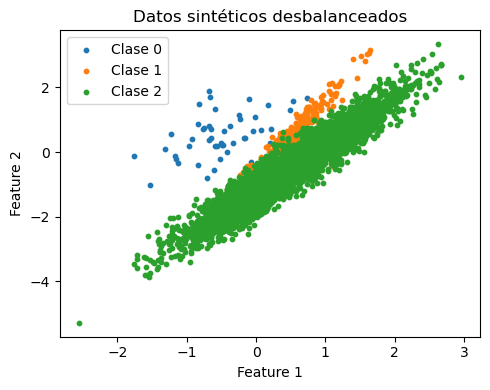

In [35]:
plot_data(X, y, "Datos sintéticos desbalanceados")



**Random Over Sampler** 

In [28]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_osampled, y_osampled = ros.fit_resample(X, y)

print(sorted(Counter(y_osampled).items()))


[(0, 4674), (1, 4674), (2, 4674)]


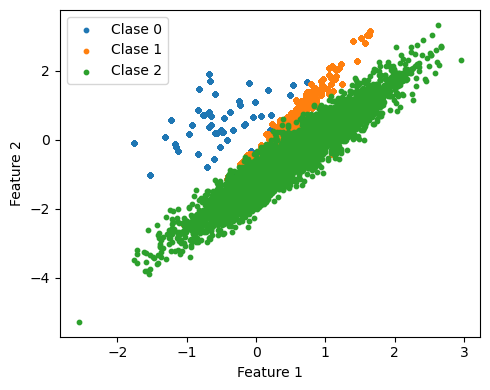

In [36]:
plot_data(X_osampled, y_osampled, "")

**Random Under Sampler**

In [32]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_usampled, y_usampled = rus.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 64), (1, 64), (2, 64)]


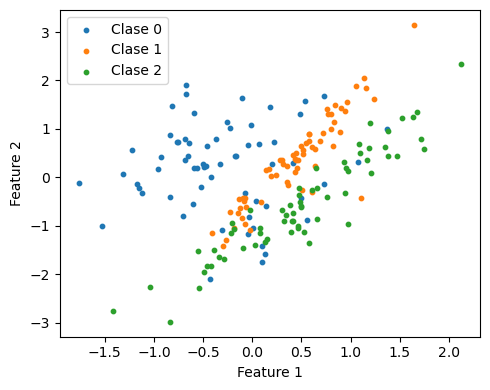

In [37]:
plot_data(X_usampled, y_usampled, "")

#### Generación sintética de datos para clases minoritarias

#### SMOTE (Synthetic Minority Over-sampling Technique)


SMOTE crea nuevos ejemplos minoritarios interpolando entre un punto minoritario y uno de sus vecinos minoritarios más cercanos. No copia ejemplos, genera combinaciones en el espacio de atributos.

Sea un ejemplo minoritario $x_i$ 

1. Se selecciona uno de sus $k$ vecinos minoritarios más cercanos $x_i^{(nn)}$.
2. Se genera un número aleatorio $\lambda$ en el intervalo $(0,1)$.
3. Se crea un nuevo ejemplo sintético:


$$x_{\text{nuevo}} = x_i + \lambda \cdot (x_i^{(nn)} - x_i)$$

**Desventajas**

- Puede producir más sintéticos justo en fronteras ruidosas y con solapamiento, incrementando falsos positivos si no se controla.

- Sensible a la elección de $k$

- En datos con mucho ruido de etiquetas, amplifica el problema.

**Variantes  de SMOTE**


**Borderline-SMOTE** es una variante de SMOTE cuyo objetivo es fortalecer la frontera de decisión entre clases, enfocándose específicamente en los ejemplos minoritarios que están más expuestos a ser mal clasificados. Estos puntos son los que se encuentran cerca de la clase mayoritaria, donde se concentran la mayoría de los errores.

**SMOTE-NC (Nominal + Continuous)**  es una variante de SMOTE diseñada para trabajar con datasets que contienen simultáneamente variables numéricas continuas. Para ello, aplica la interpolación lineal tradicional de SMOTE únicamente sobre las características continuas, mientras que para las variables categóricas asigna el valor más frecuente entre los vecinos seleccionados

<p style="text-align: left; font-size: 14px;"> 
    <strong> Fig.3. </strong><br>
    Generación sintética 
   </p>


```{image} Imagenes/smote.png
:width: 500px
:align: left
:alt: unidad
```

<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Adaptado de Bernardo, A. et al. (2021).



#### ADASYN (Adaptive Synthetic Sampling)

ADASYN (Adaptive Synthetic Sampling) es un método se enfoca en regiones del espacio donde la clase minoritaria está rodeada de mayoritarios, es decir, donde existe mayor incertidumbre o riesgo de clasificación incorrecta. El objetivo es reducir el sesgo que genera el desbalance y mejorar el rendimiento en zonas complejas.

1. Para cada ejemplo minoritario, se buscan sus $k$ vecinos más cercanos en todo el dataset (mayoritarios y minoritarios).

2. Se calcula la proporción de vecinos mayoritarios a su alrededor, lo que define la dificultad local de ese punto:


$$r_i = \frac{\Delta_i}{k}$$


donde $\Delta_i$ es el número de vecinos mayoritarios del ejemplo $x_i$.

3. Se normalizan los $r_i$ para distribuir la generación según la dificultad:

$\bar{r}_i = \frac{r_i}{\sum_j r_j}$


4. Se determina cuántos ejemplos sintéticos crear en total ($G$. A cada minoritario se le asigna:


$$g_i = \text{round}(\bar{r}_i \cdot G)$$

5. Cada sintético se genera igual que en SMOTE, mediante una interpolación con un vecino minoritario:

$$x_{nuevo} = x_i + \lambda \cdot (x_i^{(nn)} - x_i)$$




In [39]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN

In [40]:
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X, y)
print("SMOTE:", Counter(y_sm))


bl = BorderlineSMOTE(random_state=0, kind='borderline-1')
X_bl, y_bl = bl.fit_resample(X, y)
print("Borderline-SMOTE:", Counter(y_bl))


ada = ADASYN(random_state=0)
X_ada, y_ada = ada.fit_resample(X, y)
print("ADASYN:", Counter(y_ada))

SMOTE: Counter({2: 4674, 1: 4674, 0: 4674})
Borderline-SMOTE: Counter({2: 4674, 1: 4674, 0: 4674})
ADASYN: Counter({0: 4679, 1: 4676, 2: 4674})


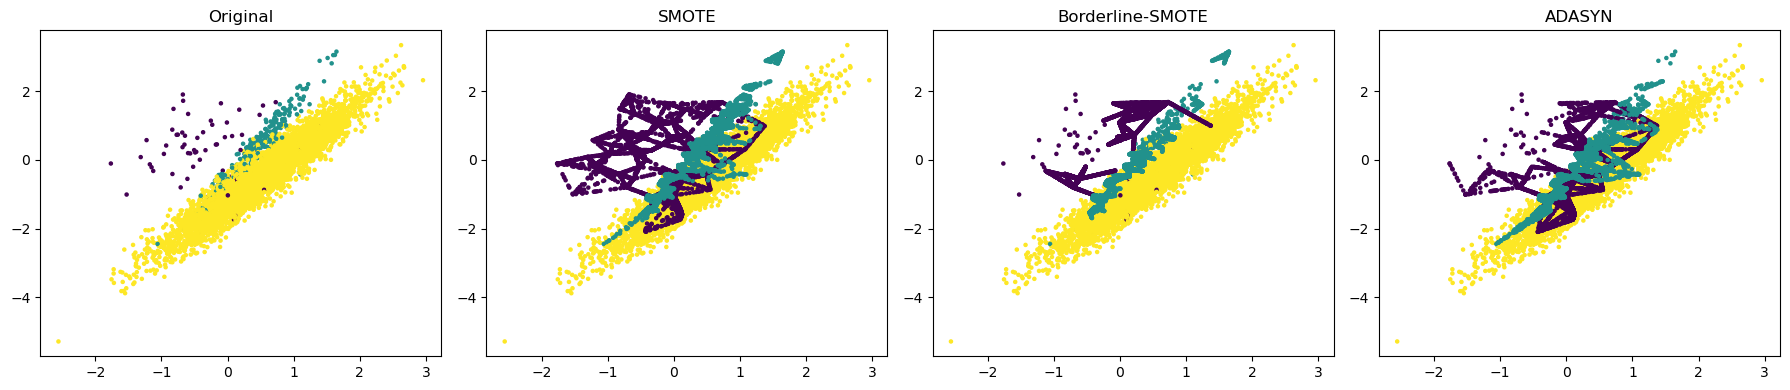

In [41]:
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
datasets = [(X, y, "Original"), (X_sm, y_sm, "SMOTE"),
            (X_bl, y_bl, "Borderline-SMOTE"), (X_ada, y_ada, "ADASYN")]

for i, (X_res, y_res, title) in enumerate(datasets):
    axs[i].scatter(X_res[:, 0], X_res[:, 1], c=y_res, s=5)
    axs[i].set_title(title)

plt.tight_layout()

### Reducción controlada 

**Técnica Cluster Centroids**  es un método de submuestreo (undersampling)  su propósito es reducir el tamaño de estas clases sin perder la representatividad estadística de sus patrones internos. En lugar de eliminar instancias de manera aleatoria, ClusterCentroids aplica un algoritmo de agrupamiento, generalmente K-Means, sobre cada clase mayoritaria. El número de clústeres se fija igual al tamaño de la clase minoritaria y, posteriormente, se calcula el centroide de cada grupo. Estos centroides reemplazan a los datos originales de la clase mayoritaria. 

p style="text-align: left; font-size: 14px;"> 
    <strong> Fig.4. </strong><br>
    Cluster Centroids 
   </p>


```{image} Imagenes/kmea.jpg
:width: 500px
:align: left
:alt: unidad
```

<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Adaptado de Bernardo, A. et al. (2021).

**Técnica ENN (Edited Nearest Neighbors)** es una técnica de depuración de datos. Su funcionamiento consiste en evaluar cada instancia del conjunto de datos mediante sus k vecinos más cercanos; si la clase mayoritaria de dichos vecinos no coincide con la clase de la instancia evaluada, esta se considera ruidosa o mal ubicada respecto a la estructura del espacio de características y se elimina. Esto permite reducir el solapamiento entre clases, mejorar la definición de la frontera de decisión y proporcionar un conjunto de entrenamiento más limpio para el modelo. Sin embargo, ENN puede eliminar demasiadas muestras, afectando la representatividad de las clases, y su costo computacional puede ser elevado cuando el conjunto de datos es grande, ya que requiere calcular distancias para cada instancia.

p style="text-align: left; font-size: 14px;"> 
    <strong> Fig.5. </strong><br>
    ENN.png
   </p>


```{image} Imagenes/kmea.jpg
:width: 500px
:align: left
:alt: unidad
```

<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Adaptado de Bernardo, A. et al. (2021).

In [43]:
from imblearn.under_sampling import ClusterCentroids, EditedNearestNeighbours

cc = ClusterCentroids(random_state=0, sampling_strategy="auto")
X_cc, y_cc = cc.fit_resample(X, y)
print("ClusterCentroids:", Counter(y_cc))


enn = EditedNearestNeighbours(n_neighbors=3, kind_sel="all")
X_enn, y_enn = enn.fit_resample(X, y)
print("EditedNearestNeighbours:", Counter(y_enn))

ClusterCentroids: Counter({0: 64, 1: 64, 2: 64})
EditedNearestNeighbours: Counter({2: 4423, 1: 127, 0: 64})


c:\Users\pc\.conda\envs\igac_cf\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


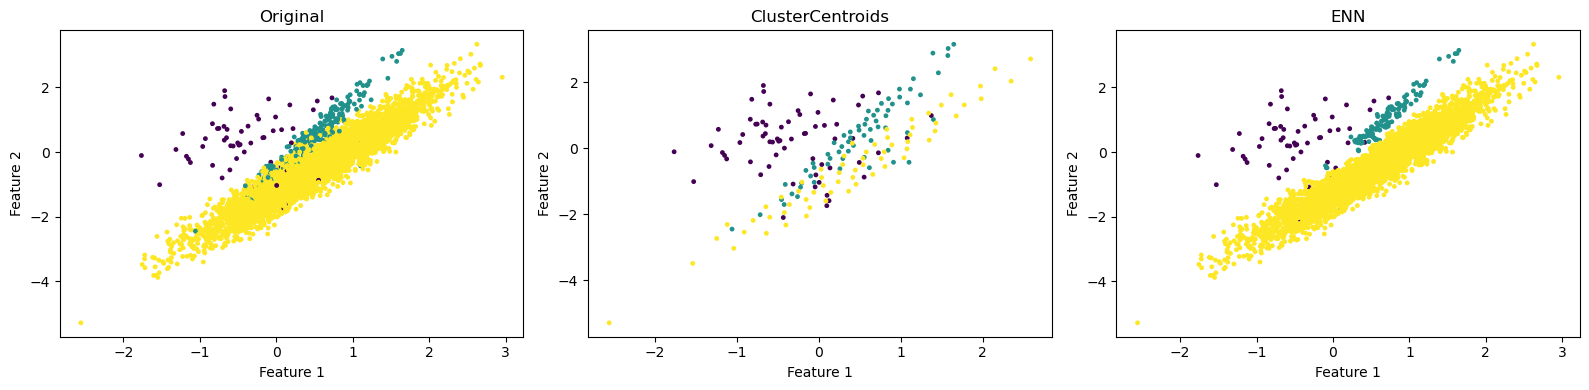

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
datasets = [
    (X, y, "Original"),
    (X_cc, y_cc, "ClusterCentroids"),
    (X_enn, y_enn, "ENN")
]

for i, (X_res, y_res, title) in enumerate(datasets):
    axs[i].scatter(X_res[:, 0], X_res[:, 1], c=y_res, s=6)
    axs[i].set_title(title)
    axs[i].set_xlabel("Feature 1")
    axs[i].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

**Referencias**

Chen, X., Wang, L., & Du, Z. (2024). A survey on imbalanced data learning: latest research. *Artificial Intelligence Review*. https://doi.org/10.1007/s10462-024-10759-6

Johnson, J. M., & Khoshgoftaar, T. M. (2019). Survey on deep learning with class imbalance. *Journal of Big Data, 6*(1), 27. https://doi.org/10.1186/s40537-019-0192-5

Ustuner, M. (2016). Balanced vs imbalanced training data: Classifying RapidEye data with support vector machines. *The International Archives of the Photogrammetry, Remote Sensing and Spatial Information Sciences, XLI-B7*, 379–384. https://doi.org/10.5194/isprsarchives-XLI-B7-379-2016

Rawat, S., & Saini, R. (2023). Evaluating the impact of sampling designs on the performance of machine learning techniques for land use land cover classification using Sentinel-2 data. *International Journal of Remote Sensing, 44*(24), 7889–7908. https://doi.org/10.1080/01431161.2023.2290994

Buda, M., Maki, A., & Mazurowski, M. A. (2018). A systematic study of the class imbalance problem in convolutional neural networks. *Neural Networks, 106*, 249–259. https://doi.org/10.1016/j.neunet.2018.07.011

Malialis, K., Roveri, M., Alippi, C., Panayiotou, C. G., & Polycarpou, M. M. (2022). A hybrid active-passive approach to imbalanced nonstationary data stream classification. *2022 IEEE Symposium Series on Computational Intelligence (SSCI)*, 1021–1027. https://doi.org/10.1109/SSCI51031.2022.10022140

Le, T., Vo, M., Vo, B., Lee, M., & Baik, S. (2019). A hybrid approach using oversampling technique and cost-sensitive learning for bankruptcy prediction. *Complexity, 2019*, 1–12. https://doi.org/10.1155/2019/8460934

Bernardo, A., & Della Valle, E. (2021). VFC-SMOTE: Very fast continuous synthetic minority oversampling for evolving data streams. *Data Mining and Knowledge Discovery, 35*(4), 1454–1479. https://doi.org/10.1007/s10618-021-00786-0


